|<img style="float: right; padding-right: 10px; width: 500px" src="https://blog.openroadautogroup.com/wp-content/uploads/2022/10/resalevalue-3.jpg">

# Used Car Value Prediction Model

In [6]:
""" RUN THIS CELL TO GET THE RIGHT FORMATTING """
import requests
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/css/cpsc6300.css'
styles = requests.get(css_file).text
HTML(styles)

In [48]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting
%matplotlib inline

from sklearn.model_selection import train_test_split #splitting data into training and testing
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
import xgboost
from xgboost import XGBRegressor 
from catboost import CatBoostRegressor

from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

In [8]:
df_mumbai = pd.read_csv('Dataset/UsedCars_Mumbai.csv',index_col=False)
df_delhi = pd.read_csv('Dataset/UsedCars_Delhi.csv',index_col=False)
df_banglore = pd.read_csv('Dataset/UsedCars_Banglore.csv',index_col=False)
df_hyderabad = pd.read_csv('Dataset/UsedCars_Hyderabad.csv',index_col=False)
df_chennai = pd.read_csv('Dataset/UsedCars_Chennai.csv',index_col=False)
df_pune = pd.read_csv('Dataset/UsedCars_Pune.csv',index_col=False)
df_kolkata = pd.read_csv('Dataset/UsedCars_Kolkata.csv',index_col=False)

In [9]:
df = pd.concat([df_mumbai,df_delhi,df_banglore,df_hyderabad,df_chennai,df_pune,df_kolkata],axis=0)  #concatenating all the dataframes into one
df

,Unnamed: 0,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city
0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane
3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.0,25000.0,Diesel,Mumbai
4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai
...,...,...,...,...,...,...,...,...,...
242,242,2020,Audi,Audi A4 35 TDI Premium Plus,A4,4400000.0,16000.0,Diesel,Chennai
243,243,2013,Audi,Audi A6 35 TDI Premium,A6,2100000.0,40000.0,Diesel,Chennai
244,244,2012,BMW,BMW 5 Series 520d Sedan,5,1800000.0,82000.0,Diesel,Chennai
245,245,2019,Mahindra,Mahindra Alturas G4 2WD AT [2018-2020],Alturas,2700000.0,30000.0,Diesel,Chennai


DATA WRANGLING

In [10]:
df.drop(['Unnamed: 0'],axis=1,inplace=True) #dropping the unnamed column
df

,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city
0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai
1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai
2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane
3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.0,25000.0,Diesel,Mumbai
4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai
...,...,...,...,...,...,...,...,...
242,2020,Audi,Audi A4 35 TDI Premium Plus,A4,4400000.0,16000.0,Diesel,Chennai
243,2013,Audi,Audi A6 35 TDI Premium,A6,2100000.0,40000.0,Diesel,Chennai
244,2012,BMW,BMW 5 Series 520d Sedan,5,1800000.0,82000.0,Diesel,Chennai
245,2019,Mahindra,Mahindra Alturas G4 2WD AT [2018-2020],Alturas,2700000.0,30000.0,Diesel,Chennai


In [11]:
df.reset_index(drop=True,inplace=True) #resetting the index
df

,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city
0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai
1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai
2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane
3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.0,25000.0,Diesel,Mumbai
4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai
...,...,...,...,...,...,...,...,...
1720,2020,Audi,Audi A4 35 TDI Premium Plus,A4,4400000.0,16000.0,Diesel,Chennai
1721,2013,Audi,Audi A6 35 TDI Premium,A6,2100000.0,40000.0,Diesel,Chennai
1722,2012,BMW,BMW 5 Series 520d Sedan,5,1800000.0,82000.0,Diesel,Chennai
1723,2019,Mahindra,Mahindra Alturas G4 2WD AT [2018-2020],Alturas,2700000.0,30000.0,Diesel,Chennai


In [12]:
df.shape #checking the shape of the dataframe

(1725, 8)

In [13]:
df.info() #checking the info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1725 non-null   int64  
 1   brand                    1725 non-null   object 
 2   full_model_name          1725 non-null   object 
 3   model_name               1725 non-null   object 
 4   price                    1725 non-null   float64
 5   distance_travelled(kms)  1725 non-null   float64
 6   fuel_type                1725 non-null   object 
 7   city                     1725 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 107.9+ KB


In [14]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #setting the float format of the dataframe
df.describe() #checking the description of the dataframe

,year,price,distance_travelled(kms)
count,1725.000,1725.000,1725.000
mean,2015.391,1494837.391,53848.256
std,3.208,1671657.728,44725.542
min,1990.000,62500.000,350.000
25%,2013.000,545000.000,29000.000
50%,2016.000,875000.000,49000.000
75%,2018.000,1825000.000,70500.000
max,2021.000,14700000.000,790000.000


In [15]:
df.isnull().sum() #checking the null values in the dataframe

year                       0
brand                      0
full_model_name            0
model_name                 0
price                      0
distance_travelled(kms)    0
fuel_type                  0
city                       0
dtype: int64

In [16]:
df.duplicated().sum() #checking the duplicated values in the dataframe

425

In [17]:
df[df.duplicated(keep=False)].value_counts(ascending=False) #checking the value counts of the dataframe

year  brand       full_model_name                                           model_name  price        distance_travelled(kms)  fuel_type  city   
2018  Ford        Ford EcoSport Titanium + 1.5L TDCi                        EcoSport    1090000.000  20000.000                Diesel     Chennai    4
2017  Skoda       Skoda Octavia 2.0 TDI CR Style Plus AT [2017]             Octavia     2000000.000  30000.000                Diesel     Chennai    4
2019  Hyundai     Hyundai Verna 1.6 VTVT SX (O)                             Verna       1195000.000  10000.000                Petrol     Chennai    4
                  Hyundai Venue SX Plus 1.0 Turbo DCT                       Venue       1125000.000  14000.000                Petrol     Chennai    4
2012  Hyundai     Hyundai i20 Magna 1.2                                     i20         375000.000   66000.000                Petrol     Chennai    4
                                                                                                         

NOTE - There are no null values and a total 425 duplicate entries for 347 vehicles

### DATA CLEANING

In [18]:
df.drop_duplicates(inplace=True, keep='first') #dropping the duplicated values in the dataframe

In [19]:
df.duplicated().sum() #checking the duplicated values in the dataframe

0

In [20]:
df.brand.unique()

array(['Honda', 'Nissan', 'Toyota', 'Mercedes-Benz', 'Hyundai',
       'Maruti Suzuki', 'Renault', 'Volkswagen', 'Skoda', 'BMW', 'Tata',
       'Audi', 'Bentley', 'Ford', 'Mahindra', 'Jaguar', 'Lamborghini',
       'MINI', 'Land Rover', 'Chevrolet', 'Datsun', 'Jeep', 'Porsche',
       'Volvo', 'MG', 'Lexus', 'Mitsubishi', 'Kia', 'Fiat', 'Isuzu',
       'Mahindra-Renault'], dtype=object)

In [21]:
df.model_name.unique()

array(['Brio', 'Sunny', 'Fortuner', 'E-Class', 'Verna', 'i20', 'Glanza',
       'GLE', 'Grand', 'Swift', 'Xcent', 'Innova', 'Baleno', 'Pulse',
       'Corolla', 'Polo', 'WR-V', 'Ritz', 'Rapid', 'City', 'Celerio', '3',
       'Vento', 'Jazz', 'Nano', 'GLA', 'A-Star', 'Q5', 'X1', 'Z4', 'A3',
       'A4', 'X3', 'Continental', 'Q3', 'Q7', 'A6', '7', 'Endeavour',
       'XUV500', 'F-Pace', 'XE', 'Gallardo', 'Countryman', 'C-Class',
       'Evoque', 'S-Class', 'Lodgy', 'CLA', 'Creta', 'A8', 'B-Class',
       'A-Class', '5', 'Cooper', 'Terrano', 'CR-V', 'Freelander', 'Ciaz',
       'Beat', 'KUV100', 'Duster', 'redi-GO', 'Tiago', 'Altroz', 'TUV300',
       'Vitara', 'Etios', 'Figo', 'Civic', 'Compass', 'Elite', 'Bolero',
       'SX4', 'Cayenne', 'V40', 'Superb', 'Dzire', 'i10', 'Zest', 'BR-V',
       'S-Cross', 'Elantra', 'Discovery', 'Accord', 'Scorpio', 'X5',
       'Estilo', 'XF', 'Santro', '6', 'GO', 'Passat', 'Wagon', 'Jetta',
       'Safari', 'EcoSport', 'Kwid', 'Hector', 'Mustang', 'SLK

In [22]:
df.groupby('brand')['model_name'].value_counts().head(30)

brand      model_name 
Audi       Q3             18
           Q7             17
           A6             13
           A4             10
           Q5              8
           A3              4
           A8              2
BMW        3              19
           5              16
           X1             16
           7              10
           X5              6
           X3              6
           6               3
           Z4              2
           X7              1
           X4              1
Bentley    Continental     3
Chevrolet  Beat            5
           Cruze           1
           Enjoy           1
Datsun     GO              2
           redi-GO         1
Fiat       Abarth          1
           Avventura       1
Ford       EcoSport       26
           Endeavour      15
           Figo            5
           Mustang         4
           Aspire          1
Name: count, dtype: int64

In [23]:
df.drop(['full_model_name'],axis=1,inplace=True) #dropping the full_model_name column'])

In [24]:
df

,year,brand,model_name,price,distance_travelled(kms),fuel_type,city
0,2016,Honda,Brio,425000.000,9680.000,Petrol,Mumbai
1,2012,Nissan,Sunny,325000.000,119120.000,Diesel,Mumbai
2,2017,Toyota,Fortuner,2650000.000,64593.000,Diesel,Thane
3,2017,Mercedes-Benz,E-Class,4195000.000,25000.000,Diesel,Mumbai
4,2012,Hyundai,Verna,475000.000,23800.000,Diesel,Mumbai
...,...,...,...,...,...,...,...
1620,2012,Hyundai,Verna,550000.000,52000.000,Diesel,Chennai
1673,2011,Toyota,Innova,1000000.000,190000.000,Diesel,Chennai
1674,2017,Volkswagen,Polo,585000.000,38000.000,Petrol,Chennai
1676,2017,Hyundai,Creta,1025000.000,37000.000,Petrol,Chennai


### Removing Outliers

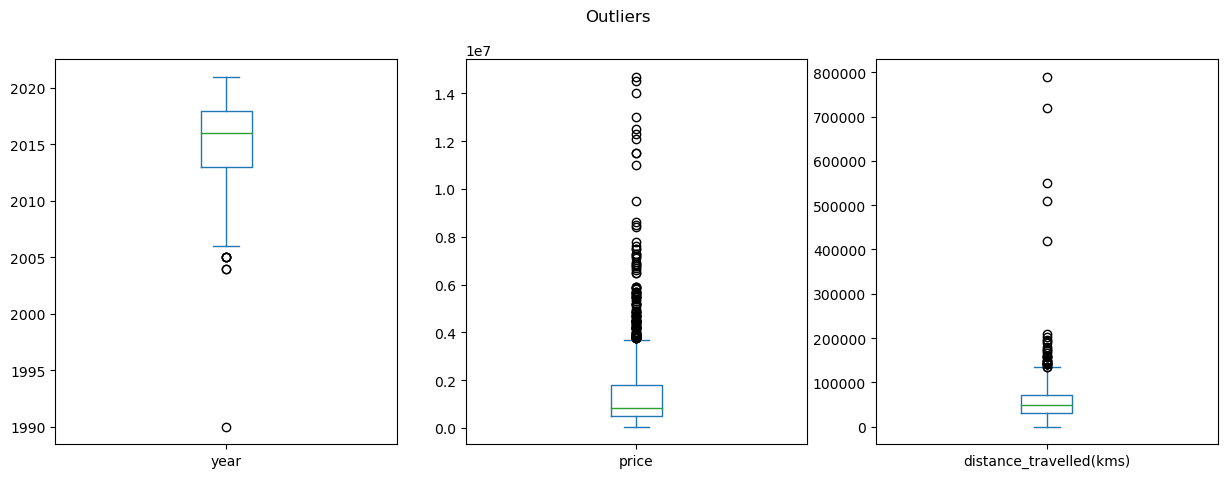

In [25]:
df_outliers = df[['year', 'price', 'distance_travelled(kms)']]
df_outliers.plot(subplots=True, kind='box', figsize=(15, 5), layout=(1, 3), title='Outliers')
plt.show()

In [26]:
df.drop(df[df['year']<2005].index,inplace=True) #dropping the rows where year is less than 2000

In [27]:
df.drop(df[df['price']<100000].index,inplace=True) #dropping the rows where price is less than 100000

In [28]:
df.drop(df[df['distance_travelled(kms)']>300000].index,inplace=True) #dropping the rows where distance_travelled(kms) is greater than 300000

In [29]:
df.reset_index(drop=True,inplace=True) #resetting the index

In [30]:
df

,year,brand,model_name,price,distance_travelled(kms),fuel_type,city
0,2016,Honda,Brio,425000.000,9680.000,Petrol,Mumbai
1,2012,Nissan,Sunny,325000.000,119120.000,Diesel,Mumbai
2,2017,Toyota,Fortuner,2650000.000,64593.000,Diesel,Thane
3,2017,Mercedes-Benz,E-Class,4195000.000,25000.000,Diesel,Mumbai
4,2012,Hyundai,Verna,475000.000,23800.000,Diesel,Mumbai
...,...,...,...,...,...,...,...
1282,2012,Hyundai,Verna,550000.000,52000.000,Diesel,Chennai
1283,2011,Toyota,Innova,1000000.000,190000.000,Diesel,Chennai
1284,2017,Volkswagen,Polo,585000.000,38000.000,Petrol,Chennai
1285,2017,Hyundai,Creta,1025000.000,37000.000,Petrol,Chennai


## Exploratory Data Analysis

1. Common Car Brands

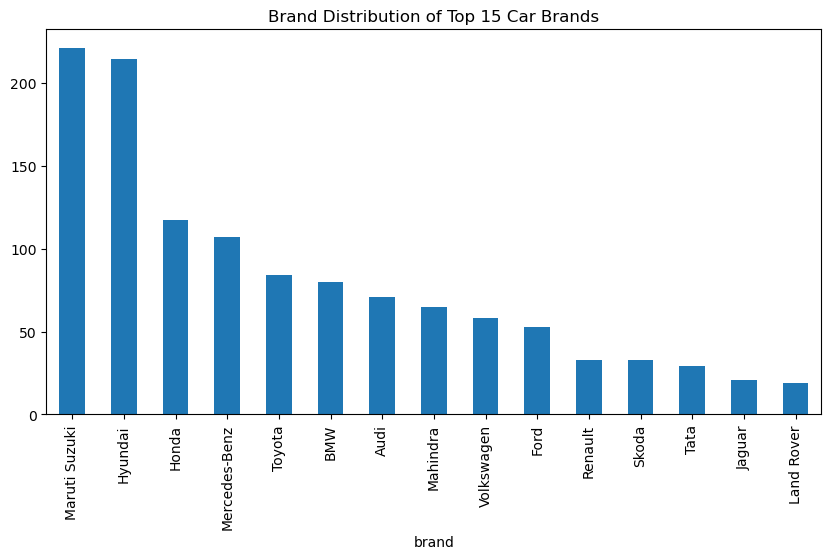

In [31]:
df.brand.value_counts()[:15].plot(kind='bar', figsize=(10, 5), title='Brand Distribution of Top 15 Car Brands')
plt.show()

2. Common Car Models

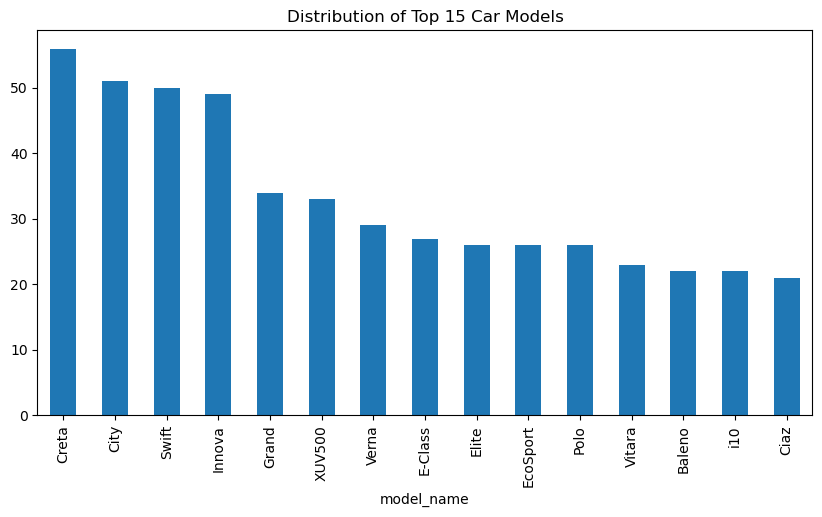

In [32]:
df.model_name.value_counts()[:15].plot(kind='bar', figsize=(10, 5), title='Distribution of Top 15 Car Models')
plt.show()

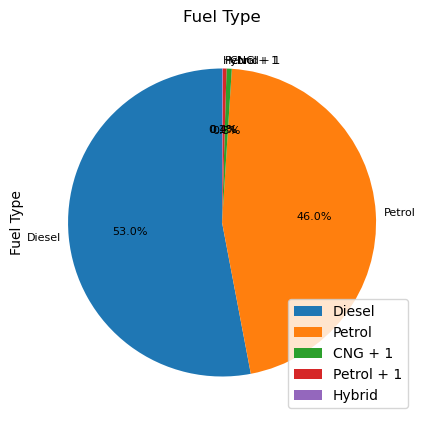

+-------------+---------+
| fuel_type   |   count |
|-------------+---------|
| Diesel      |     682 |
| Petrol      |     592 |
| CNG + 1     |       7 |
| Petrol + 1  |       5 |
| Hybrid      |       1 |
+-------------+---------+


In [33]:
df.fuel_type.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(5, 5), startangle=90, title='Fuel Type', fontsize=8, label='Fuel Type', legend=True, labeldistance=1.05)
plt.show()
print(tabulate(pd.DataFrame(df.fuel_type.value_counts()), headers='keys', tablefmt='psql'))

## FEATURE ENGINEERING

In [34]:
df.brand.unique()

array(['Honda', 'Nissan', 'Toyota', 'Mercedes-Benz', 'Hyundai',
       'Maruti Suzuki', 'Renault', 'Volkswagen', 'Skoda', 'BMW', 'Tata',
       'Audi', 'Bentley', 'Ford', 'Mahindra', 'Jaguar', 'Lamborghini',
       'MINI', 'Land Rover', 'Chevrolet', 'Datsun', 'Jeep', 'Porsche',
       'Volvo', 'MG', 'Lexus', 'Mitsubishi', 'Kia', 'Fiat', 'Isuzu',
       'Mahindra-Renault'], dtype=object)

In [35]:
df.city.unique()

array(['Mumbai', 'Thane', 'Dehradun', 'Navi Mumbai', 'Delhi', 'Noida',
       'Ghaziabad', 'Panchkula', 'Faridabad', 'Agra', 'Lucknow',
       'Bangalore', 'Hyderabad', 'Chennai', 'Pune'], dtype=object)

In [36]:
df.model_name.unique().shape

(167,)

In [37]:
current_yr = datetime.datetime.now().year
df['age'] = current_yr - df['year']
df.head()

,year,brand,model_name,price,distance_travelled(kms),fuel_type,city,age
0,2016,Honda,Brio,425000.000,9680.000,Petrol,Mumbai,7
1,2012,Nissan,Sunny,325000.000,119120.000,Diesel,Mumbai,11
2,2017,Toyota,Fortuner,2650000.000,64593.000,Diesel,Thane,6
3,2017,Mercedes-Benz,E-Class,4195000.000,25000.000,Diesel,Mumbai,6
4,2012,Hyundai,Verna,475000.000,23800.000,Diesel,Mumbai,11


## Data Modelling

### Feature Selection

In [38]:
# Returns modified df, formatted for Model Training
def feature_matrix(in_df, brand_model=False):

    # Target Encoding for Brand and Model
    brand_means = in_df.groupby('brand')['price'].mean()
    model_means = in_df.groupby('model_name')['price'].mean()

    in_df['brand_enc'] = in_df['brand'].map(brand_means)
    in_df['model_enc'] = in_df['model_name'].map(model_means)

    # Removing Unnecessary Columns
    if brand_model:
        in_df.drop(['price', 'year', 'fuel_type', 'city', 'Petrol'], axis=1, inplace=True) 
    else:   
        in_df.drop(['price', 'brand', 'model_name', 'year', 'fuel_type', 'city', 'Petrol'], axis=1, inplace=True)
    in_df.reset_index(drop=True, inplace=True)

    return in_df

In [39]:
le = LabelEncoder() # Label Encoder for Categorical Variables
df_fs = df.copy()

y = df_fs['price'] # Target Variable

# Encoding Categorical Variables
df_fs['fuel_encoded'] = le.fit_transform(df_fs['fuel_type'])
df_fs['city_encoded'] = le.fit_transform(df_fs['city'])
df_fs['Petrol'] = 0 # Dummy Variable for Petrol Fuel Type

# Target Encoding for Brand and Model
X_fs = feature_matrix(df_fs)
X_fs.head()

,distance_travelled(kms),age,fuel_encoded,city_encoded,brand_enc,model_enc
0,9680.000,7,3,9,650461.538,333384.615
1,119120.000,11,1,9,437222.222,418750.000
2,64593.000,6,1,14,1615238.095,2387692.308
3,25000.000,6,1,9,3276719.626,2661814.815
4,23800.000,11,1,9,759869.159,750758.621


In [40]:
# Function to scale data using MinMaxScaler
def data_scaler(dataset):
    scaler = MinMaxScaler()
    s_data = scaler.fit_transform(dataset)  # don't scale target column

    # re-assign column names
    scaled_dataset = pd.DataFrame(s_data, columns=dataset.columns)
    
    return scaled_dataset

# Function to get k-best features using SelectKBest and f_regression
def get_k_best_features(features, tar_col, k):

    # use chi2 to score features based on independence with target variable
    selector = SelectKBest(score_func=f_regression, k=k)
    selector.fit(features, tar_col)

    # get indices of k-best features
    k_best_indices = selector.get_support(indices=True)

    # get names of k-best features
    k_best_features = features.columns[k_best_indices].tolist()

    return k_best_features

In [41]:
scaled_data = data_scaler(X_fs)

# Define dictionaries to store R2 scores of different models
ridge_r2 = {}
xgb_r2 = {}
forest_r2 = {}

# Loop to generate models with different number of predictors
for k in range(1,7):
    X_kbest = get_k_best_features(scaled_data, y, k) # Generated models by incrementing one predictor each loop
    print(f"k: {k} , best features: {X_kbest}") # Print the best features for each model
    
    X_train, X_test, y_train, y_test = train_test_split(scaled_data[X_kbest], y, test_size=0.3, random_state=50)  # train test split
    
    # Ridge model fit
    ridge = Ridge(alpha=0.1)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    ridge_r2[k]= r2_score(y_test, y_pred)
    
    # Random Forest model fit
    rforest = RandomForestRegressor()
    rforest.fit(X_train, y_train)
    y_pred = rforest.predict(X_test)
    forest_r2[k]= r2_score(y_test, y_pred)

    # XGBoost model fit
    xgb = XGBRegressor() 
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    xgb_r2[k] = r2_score(y_test, y_pred)

k: 1 , best features: ['model_enc']


k: 2 , best features: ['brand_enc', 'model_enc']
k: 3 , best features: ['age', 'brand_enc', 'model_enc']
k: 4 , best features: ['age', 'fuel_encoded', 'brand_enc', 'model_enc']
k: 5 , best features: ['distance_travelled(kms)', 'age', 'fuel_encoded', 'brand_enc', 'model_enc']
k: 6 , best features: ['distance_travelled(kms)', 'age', 'fuel_encoded', 'city_encoded', 'brand_enc', 'model_enc']


In [42]:
# Create dataframe of R2 scores for each model
r2_df = pd.DataFrame.from_dict(ridge_r2, orient='index', columns=['Ridge_R2_Score'])
r2_df = r2_df.rename_axis('k')
r2_df['RandomForest_R2_Score'] = forest_r2.values()
r2_df['XGBoost_R2_Score'] = xgb_r2.values()
r2_df

,Ridge_R2_Score,RandomForest_R2_Score,XGBoost_R2_Score
k,,,
1,0.800,0.728,0.713
2,0.798,0.724,0.712
3,0.847,0.927,0.923
4,0.846,0.911,0.876
5,0.848,0.935,0.917
6,0.848,0.917,0.911


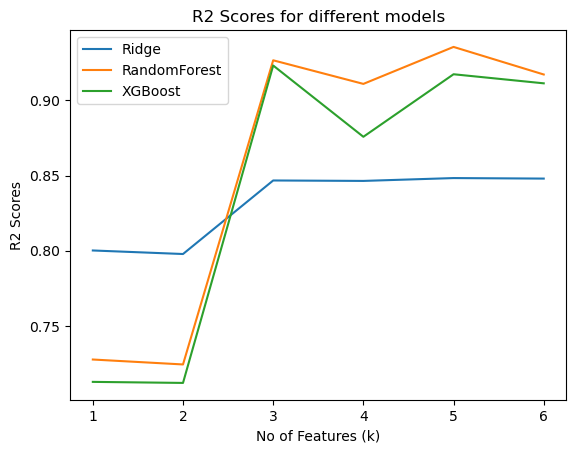

In [43]:
# Plot R2 scores for each model
plt.plot(ridge_r2.keys(), ridge_r2.values(), label = 'Ridge')
plt.plot(forest_r2.keys(), forest_r2.values(), label = 'RandomForest')
plt.plot(xgb_r2.keys(), xgb_r2.values(), label = 'XGBoost')
plt.title('R2 Scores for different models')
plt.xlabel('No of Features (k)')
plt.ylabel('R2 Scores')
plt.legend()
plt.show()

In [44]:
###################### Model with 5 top features #######################
# One-hot encode fuel type
df_fuel = pd.get_dummies(df['fuel_type']).astype('int64')
df2 = pd.concat([df, df_fuel], axis=1)

traindf, testdf = train_test_split(df2, test_size=0.3, random_state=50)

############################## Training ################################
ytrain = traindf['price'] # Target Variable

# Format data for model training
Xtrain = feature_matrix(traindf.copy())

# Train test split for hyperparameter tuning
traindf_ht = feature_matrix(df2.copy())
############################## Testing ################################ 
ytest = testdf['price'] # Target Variable

# Format data for model training
Xtest = feature_matrix(testdf.copy())
####################################################################### 

### Hyperparameter Tuning

In [ ]:
# Hyperparameter tuning using GridSearchCV
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 50, 100, 200],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        },
        'xgboost': {
            'model': XGBRegressor(),
            'params': {
                'learning_rate': [0.1, 0.18, 0.2],
                'max_depth': [3, 6, 9],
                'n_estimators': [20, 50, 80],
                'subsample': [0.9, 1]
            }
        },
        'adaboost': {
            'model': AdaBoostRegressor(),
            'params': {
                'n_estimators': [50, 100, 150],
                'learning_rate': [0.01, 0.05, 0.1],
                'loss': ['linear', 'square', 'exponential']
            }
        },
        'catboost': {
            'model': CatBoostRegressor(),
            'params': {
                'learning_rate': [0.01, 0.1, 0.2],
                'depth': [4, 7, 10],
                'iterations': [50, 100, 150]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random'],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        }
    }

    scores = [] # List to store scores of each model
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) # 5-fold cross validation

    # Loop to fit models and append scores to scores list
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, verbose=0)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

# Find best model using GridSearchCV
model_5top = find_best_model_using_gridsearchcv(traindf_ht,y)

In [50]:
model_5top

,model,best_score,best_params
0,linear_regression,0.863,"{'fit_intercept': True, 'positive': False}"
1,random_forest,0.910,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_..."
2,xgboost,0.924,"{'learning_rate': 0.18, 'max_depth': 6, 'n_est..."
3,adaboost,0.836,"{'learning_rate': 0.1, 'loss': 'linear', 'n_es..."
4,catboost,0.909,"{'depth': 4, 'iterations': 150, 'learning_rate..."
5,decision_tree,0.866,"{'criterion': 'friedman_mse', 'max_depth': 20,..."


#### Therefore, the best preforming model is **XGBoost with top 5 features**

### Model Training

In [51]:
xgb_model = XGBRegressor(learning_rate=0.18, max_depth=3, n_estimators=20, subsample=1)
xgb_model.fit(Xtrain, ytrain)
y_pred2_xgb = xgb_model.predict(Xtest)
print('R2 Score:', r2_score(ytest, y_pred2_xgb))

R2 Score: 0.9276277083844585


### Price Prediction Function

In [52]:
# Function to get a dictionary of each brand as key and its target encoding in the training set as value
def brand_encoding(in_df, brand):
    return in_df[in_df.brand == brand]['brand_enc'].unique()[0]

# Function to get a dictionary of each model as key and its target encoding in the training set as value
def model_encoding(in_df, model):
    return in_df[in_df.model_name == model]['model_enc'].unique()[0]

In [53]:
X = feature_matrix(traindf.copy(), brand_model=True) # Format data for prediction price function

In [55]:
brand_dict = {} # Dictionary to store brand encodings
model_dict = {} # Dictionary to store model encodings

brand_dict = {brand: brand_encoding(X, brand) for brand in X.brand.unique()} # Get brand encodings
model_dict = {model: model_encoding(X, model) for model in X.model_name.unique()} # Get model encodings

brands = df.brand.unique() # List of brands
models = df.model_name.unique() # List of models
fuel_types = df.fuel_type.unique() # List of fuel types

In [56]:
# Function to predict price of a car
def predict_price(dist, model_year, fuel_type, brand, model):    
    fuel_index = np.where(Xtrain.columns==fuel_type)[0][0]
    brand_enc = brand_encoding(X, brand)
    model_enc = model_encoding(X, model)

    current_yr = datetime.datetime.now().year
    age = current_yr - model_year

    x = np.zeros(len(Xtrain.columns))
    x[0] = dist
    x[1] = age
    x[-1] = model_enc
    x[-2] = brand_enc
    if fuel_index >= 0:
        x[fuel_index] = 1
    
    x = pd.DataFrame(x.reshape(1, -1), columns=Xtrain.columns)
  
    return xgb_model.predict(x)[0]

In [61]:
predict_price(150000, 2009, 'Diesel', 'Toyota', 'Fortuner')

1115623.4

In [58]:
predict_price(50000, 2010, 'Diesel', 'Maruti Suzuki', 'Swift')

335704.75

## Export model to a pickle file

In [62]:
import pickle
with open('car_resale_prediction.pickle','wb') as f:
    pickle.dump(xgb_model,f)

### Export fuel-type and column information to a file that will be useful later on in our prediction application

In [63]:
import json
columns = {
    'data_columns' : [col for col in Xtrain.columns],
    'brand_dict' : brand_dict,
    'model_dict' : model_dict,
    'brands' : brands.tolist(),
    'models' : models.tolist(),
    'fuel_types' : fuel_types.tolist()
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))